# Homework 3 - Mike Atwell
####Rockhurst University
####BIA6304
####2018 Fall Term 1

##Preparation

###Package imports

First we'll import all of the packages we'll need.

In [43]:
import pandas as pd  
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 150) #important for getting all the text

##Task 1 

Task 1 is to "read in or create a data frame with at least one column of text to be analyzed.  This could be the text you used previously or new text. Choose a prediction you would like to make with these data and create the appropriate feature space. Identify the labels you will be trying to predict and proceed to create a train-test split. Using default model parameters, fit 3 classifiers (decision tree, naïve bayes, logistic regression, or knn) to your dataset and subsequently generate predictions (just like we did in class). Feel free to set a random state variable where appropriate to facilitate replication.  Assess the performance of the models using any of the measures (confusion matrices, precision, recall, f1-score, and accuracy)."  

For this purpose I used a dataset of text messages and a classification for each as 'spam' or 'ham' available here: 

https://www.kaggle.com/team-ai/spam-text-message-classification

The label I'll be trying to predict is whether a message is spam or not, and is already contained in the dataset.  Let's import it!

###Data Import and Exploratory Data Analysis

In [44]:
pd.set_option('display.max_rows', 10) #sets output to desired length
spam_data = pd.read_csv("SPAM text message 20170820 - Data.csv") #imports csv
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-..."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


We see that the data has 5,572 rows and two columns, the 'spam' or 'ham' identifier and the text message itslef.  Before conducting the task, let's make sure the dataset is ready.  First, a quick check for nulls in the dataset:

In [45]:
spam_data.isnull().sum()

Category    0
Message     0
dtype: int64

No nulls in the dataset.  Now let's check to ensure that there are no other categories besides ham or spam:

In [46]:
spam_data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

The category column doesn't contain any values other than 'ham' or 'spam', and we see about 13.4% of the messages are spam.  

The dataset appears ready for this task!

###Preparing dataset for modeling

Now we'll get the count vectorizer and conduct a test/train split so we can run the models.

In [47]:
textStr = spam_data['Message'] #creates a generic name for the headline text; useful for reusing the code for other projects 

cv1 = CountVectorizer(binary=False, lowercase=True) 
#thought that mutiple uses of the same words might give the model more predictive power, thus kept binary to False

cv1_chat = cv1.fit_transform(textStr) #transforms text

word_count = pd.DataFrame(cv1_chat.toarray(),columns = cv1.get_feature_names())

pd.set_option('display.max_rows', 10) #sets output to desired length
word_count

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see the feature space is 8,709 unique words or numbers.  Now let's split the data into train and test sets.

In [48]:
y = spam_data['Category'].values #this is an array of labels
X = word_count

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2112) #random_state is set seed

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900, 8709)
(1672, 8709)
(3900,)
(1672,)


We now have a training set of 3,900 rows and a test set of 1,672 rows.

###Models

Now let's run the models on the data.  For our initial look we'll use three with default settings: Decision Tree, Naive Bayes, and Logisitic Regression.

####Decision Tree

In [49]:
# fit a Decision Tree model_dt1 to the data
model_dt1 = DecisionTreeClassifier(random_state = 2112)
print(model_dt1)
model_dt1.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = model_dt1.predict(X_test)

print(model_dt1.score(X_test, y_test))

# summarize the fit of the model_dt1
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf1_expected, clf1_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2112,
            splitter='best')
0.9706937799043063
accuracy: 0.9706937799043063
             precision    recall  f1-score   support

        ham       0.98      0.99      0.98      1450
       spam       0.93      0.84      0.88       222

avg / total       0.97      0.97      0.97      1672

Confusion Matrix
[[1436   14]
 [  35  187]]


The decision tree yielded an acuracy of 0.971.  Now let's try the Naive Bayes.

####Naive Bayes

In [50]:
# fit a Naive Bayes model_nb1 to the data
model_nb1 = MultinomialNB()
print(model_nb1)
model_nb1.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = model_nb1.predict(X_test)

print(model_nb1.score(X_test, y_test))

# summarize the fit of the model_nb1
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.9808612440191388
accuracy: 0.9808612440191388
             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1450
       spam       0.92      0.94      0.93       222

avg / total       0.98      0.98      0.98      1672

Confusion Matrix
[[1432   18]
 [  14  208]]


The Naive Bayes had an accuracy of 0.981, slightly better than the Decision Tree.  Now let's try logistic regression.

####Logistic Regression

In [51]:
# fit a logistic regression model_lr1 to the data
model_lr1 = LogisticRegression(random_state = 2112)
print(model_lr1)
model_lr1.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model_lr1.predict(X_test)

print(model_lr1.score(X_test, y_test))

# summarize the fit of the model_lr1
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2112, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9820574162679426
accuracy: 0.9820574162679426
             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1450
       spam       0.98      0.88      0.93       222

avg / total       0.98      0.98      0.98      1672

Confusion Matrix
[[1446    4]
 [  26  196]]


Logistic regression had even better accuracy at 0.982.

####Model Performance Comparison

For easier comparison of model performance, let's list the measures side by side.

In [52]:
metrics_data = {'Model': ['Decision Tree',
                          'Naive Bayes',
                          'Logistic Regression'],
                'TN': [1436, 1432, 1446],
                'TP': [187,208,196],
                'FN' : [35,14,26],
                'FP' : [14,18,4]}
#captures data determined above 
#TN = True Negative
#TP = True Positive
#FN = False Negative
#FP = False Positive

model_metrics = pd.DataFrame(data=metrics_data) #creates dataframe
model_metrics = model_metrics.set_index('Model') #uses model name as row title
total = model_metrics['TN']+model_metrics['TP']+model_metrics['FN']+model_metrics['FP']
model_metrics['Accuracy'] = (model_metrics['TN'] + model_metrics['TP'])/total #calculates accuracy
model_metrics['Precision'] = model_metrics['TP']/(model_metrics['TP']+model_metrics['FP']) #calculates precision
model_metrics['Recall'] = model_metrics['TP']/(model_metrics['TP']+model_metrics['FN']) #calculates recall
model_metrics['F1 Score'] = 2*model_metrics['Precision']*model_metrics['Recall']/(model_metrics['Precision']+model_metrics['Recall']) #calculates F1 score
model_metrics

,TN,TP,FN,FP,Accuracy,Precision,Recall,F1 Score
Model,,,,,,,,
Decision Tree,1436,187,35,14,0.970694,0.930348,0.842342,0.884161
Naive Bayes,1432,208,14,18,0.980861,0.920354,0.936937,0.928571
Logistic Regression,1446,196,26,4,0.982057,0.980000,0.882883,0.928910


We see that the logisitic regression performed the best on all but one measure, recall, since it at a higher number of false negatives than the naive bayes.  

In this business case I judge the logisitic regression the best, becuase of the two undesired possibilities (false positive or false negative), I consider false negatives to be more tolerable than false positives; thus, precision is the most important metric.  In essence, false negatives are spam that get through the filter, whereas false positives are real messages that get filtered out.  My preference is to deal with a bit more spam than to have real messages get filtered out.  The logistic regression was far superior to the other models in this regard, with a precision of .98.

Now we'll see about tweaking the models to squeeze out better performance.

##Task 2

Task 2 is "using a variety of parameter settings (for classifiers or vectorizers), try to improve on the performance of the baseline models.  At least 6 separate predictions should be run and the results reported in a table.  You can use any combination of parameters and classifiers; you do not need to use all classifiers. Make sure at least one example uses a preprocessing option (stemming, lemmatization, custom dictionary, custom stopwords, etc.)"



First we'll tweak the decision tree.  We'll start with a grid search on the number of max features to determine the best value.

####Decision Tree

In [53]:
# use a full grid over several parameters and cross validate 5 times
pd.set_option('display.max_rows', 15) #sets output to desired length
param_grid = {"max_features": [3,4,5,6,7,8,9,10,11,12,13,14]}
# run grid search
grid_search = GridSearchCV(model_dt1, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'max_features': 11}
Best Score: 0.9479487179487179
Best Estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2112,
            splitter='best')
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.690875,0.063487,0.037457,0.006287,3,{'max_features': 3},0.933333,0.948718,0.958974,0.933333,...,0.944359,0.009851,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.555892,0.040733,0.035587,0.003454,4,{'max_features': 4},0.942308,0.942308,0.956410,0.943590,...,0.944359,0.006415,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.559700,0.023143,0.037708,0.009486,5,{'max_features': 5},0.941026,0.937179,0.955128,0.939744,...,0.941026,0.007692,8,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.508545,0.035423,0.024089,0.003825,6,{'max_features': 6},0.943590,0.951282,0.944872,0.925641,...,0.943846,0.009878,6,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.452669,0.006519,0.020021,0.005296,7,{'max_features': 7},0.939744,0.932051,0.930769,0.938462,...,0.935128,0.003497,12,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,0.466926,0.014048,0.018139,0.003477,8,{'max_features': 8},0.937179,0.943590,0.958974,0.935897,...,0.946410,0.009608,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,0.463971,0.008359,0.016833,0.000201,9,{'max_features': 9},0.938462,0.939744,0.947436,0.925641,...,0.938718,0.007225,10,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,0.470175,0.007165,0.017037,0.000243,10,{'max_features': 10},0.933333,0.929487,0.950000,0.933333,...,0.940513,0.010653,9,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,0.464358,0.006633,0.017000,0.000095,11,{'max_features': 11},0.951282,0.948718,0.947436,0.951282,...,0.947949,0.003768,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,0.543365,0.053366,0.023646,0.007058,12,{'max_features': 12},0.939744,0.948718,0.956410,0.937179,...,0.946410,0.007041,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0


The grid search found that a max features of 11 was optimal.  Let's put it in the model.

In [54]:
# fit a Decision Tree model_dt2 to the data
model_dt2 = DecisionTreeClassifier(max_features = 11, random_state = 2112)
print(model_dt2)
model_dt2.fit(X_train, y_train)

# make predictions
clf7_expected = y_test
clf7_predicted = model_dt2.predict(X_test)

print(model_dt2.score(X_test, y_test))

# summarize the fit of the model_dt2
print("accuracy: " + str(metrics.accuracy_score(clf7_expected, clf7_predicted)))
print(metrics.classification_report(clf7_expected, clf7_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf7_expected, clf7_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2112,
            splitter='best')
0.9623205741626795
accuracy: 0.9623205741626795
             precision    recall  f1-score   support

        ham       0.96      0.99      0.98      1450
       spam       0.94      0.76      0.84       222

avg / total       0.96      0.96      0.96      1672

Confusion Matrix
[[1440   10]
 [  53  169]]


The tweak improved the number of false positives, dropping from 14 to 10, but the number of false negatives increased from 35 to 53.  Though this decreases overall accuracy slightly, I consider this an acceptable trade off since false positives (real texts that are filtered out) are the worst possible outcome.

####Naive Bayes

Now let's try tweaking the Naive Bayes.  We'll do a grid search on alpha, the smoothing parameter.

In [55]:
# use a full grid over several parameters and cross validate 5 times
pd.set_option('display.max_rows', 15) #sets output to desired length
param_grid = {"alpha": [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,5,10]}
# run grid search
grid_search = GridSearchCV(model_nb1, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'alpha': 0.01}
Best Score: 0.9805128205128205
Best Estimator MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.632115,0.045101,0.050448,0.002526,1e-06,{'alpha': 1e-06},0.982051,0.970513,0.983333,0.974359,...,0.977692,0.004770,7,0.997115,0.997115,0.996474,0.996795,0.997436,0.996987,0.000327
1,0.613954,0.047466,0.039683,0.010306,1e-05,{'alpha': 1e-05},0.983333,0.971795,0.983333,0.975641,...,0.978462,0.004471,5,0.997115,0.997115,0.996474,0.996795,0.997436,0.996987,0.000327
2,0.591759,0.023623,0.024601,0.000471,0.0001,{'alpha': 0.0001},0.983333,0.973077,0.980769,0.974359,...,0.977949,0.003838,6,0.997115,0.997115,0.996474,0.996795,0.997115,0.996923,0.000256
3,0.597808,0.040917,0.056444,0.064473,0.001,{'alpha': 0.001},0.984615,0.974359,0.983333,0.974359,...,0.978974,0.004336,4,0.996795,0.996795,0.995833,0.996474,0.997115,0.996603,0.000435
4,0.587120,0.046640,0.025111,0.001142,0.01,{'alpha': 0.01},0.984615,0.974359,0.985897,0.975641,...,0.980513,0.004686,1,0.996154,0.996795,0.995513,0.995833,0.996795,0.996218,0.000513
5,0.610113,0.078677,0.028788,0.005015,0.1,{'alpha': 0.1},0.982051,0.982051,0.982051,0.980769,...,0.980513,0.002486,1,0.994551,0.995833,0.995513,0.995192,0.995513,0.995321,0.000435
6,0.607519,0.062348,0.037345,0.009121,1,{'alpha': 1},0.980769,0.980769,0.982051,0.984615,...,0.980000,0.004336,3,0.993269,0.993910,0.992308,0.992949,0.994231,0.993333,0.000684
7,0.637259,0.074892,0.029107,0.009821,5,{'alpha': 5},0.962821,0.967949,0.967949,0.961538,...,0.964359,0.002968,8,0.973397,0.972436,0.971795,0.974679,0.975000,0.973462,0.001240
8,0.613111,0.072002,0.031069,0.003444,10,{'alpha': 10},0.947436,0.939744,0.951282,0.943590,...,0.946667,0.004485,9,0.952244,0.955449,0.950962,0.953846,0.953205,0.953141,0.001509


The grid search determined an alpha of 0.01 was optimal.  Let's try it in the model.

In [56]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model_nb2 to the data
model_nb2 = MultinomialNB(alpha=0.01)
print(model_nb2)
model_nb2.fit(X_train, y_train)

# make predictions
clf6_expected = y_test
clf6_predicted = model_nb2.predict(X_test)

print(model_nb2.score(X_test, y_test))

# summarize the fit of the model_nb2
print("accuracy: " + str(metrics.accuracy_score(clf6_expected, clf6_predicted)))
print(metrics.classification_report(clf6_expected, clf6_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf6_expected, clf6_predicted))

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
0.986244019138756
accuracy: 0.986244019138756
             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1450
       spam       0.93      0.96      0.95       222

avg / total       0.99      0.99      0.99      1672

Confusion Matrix
[[1435   15]
 [   8  214]]


Performance measures improved, with false negatives dropping from 14 to 8 and false positives from 18 to 15.  

####Logistic Regression

Now we'll try tweaking the Logistic Regression.  We'll start with a grid search on C, the inverse of regularization strength.

In [57]:
# use a full grid over several parameters and cross validate 5 times

pd.set_option('display.max_rows', 15) #sets output to desired length
param_grid = {"C": [1,5,10,20,30,40,50,60,70,80,90,100]}
# run grid search
grid_search = GridSearchCV(model_lr1, param_grid=param_grid,n_jobs=-1,cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_) 
print("Best Score:", grid_search.best_score_) 
print("Best Estimator", grid_search.best_estimator_) 
print("Grid Scores:")
pd.DataFrame(grid_search.cv_results_)

Best Params: {'C': 40}
Best Score: 0.978974358974359
Best Estimator LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2112, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Grid Scores:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.669796,0.046188,0.043245,0.010555,1,{'C': 1},0.975641,0.978205,0.979487,0.967949,...,0.976154,0.004336,12,0.998397,0.998718,0.997756,0.997756,0.997436,0.998013,0.000471
1,0.612292,0.023710,0.021282,0.000311,5,{'C': 5},0.975641,0.982051,0.982051,0.973077,...,0.978462,0.003571,9,1.000000,0.999038,0.999038,0.999038,0.999038,0.999231,0.000385
2,0.604005,0.035036,0.021785,0.000541,10,{'C': 10},0.974359,0.984615,0.982051,0.973077,...,0.978462,0.004397,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.613400,0.013547,0.040950,0.038479,20,{'C': 20},0.973077,0.985897,0.982051,0.973077,...,0.978462,0.005025,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.632172,0.068697,0.021692,0.000303,30,{'C': 30},0.973077,0.985897,0.982051,0.974359,...,0.978718,0.004770,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.621475,0.033528,0.022145,0.000352,40,{'C': 40},0.973077,0.985897,0.983333,0.974359,...,0.978974,0.004972,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.626800,0.034318,0.021401,0.000619,50,{'C': 50},0.973077,0.985897,0.983333,0.974359,...,0.978974,0.004972,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.626175,0.038764,0.021832,0.000406,60,{'C': 60},0.973077,0.984615,0.983333,0.974359,...,0.978718,0.004630,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.628527,0.071410,0.021326,0.000400,70,{'C': 70},0.973077,0.984615,0.983333,0.974359,...,0.978718,0.004630,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.613346,0.030323,0.021514,0.000686,80,{'C': 80},0.973077,0.984615,0.983333,0.974359,...,0.978718,0.004630,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


The grid search determined that C=40 is the optimum value.  Let's put that in the model and see the result.

In [58]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model_lr2 = LogisticRegression(C=40, random_state = 2112)
print(model_lr2)
model_lr2.fit(X_train, y_train)

# make predictions
clf4_expected = y_test
clf4_predicted = model_lr2.predict(X_test)

print(model_lr2.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf4_expected, clf4_predicted)))
print(metrics.classification_report(clf4_expected, clf4_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf4_expected, clf4_predicted))

LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2112, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.986244019138756
accuracy: 0.986244019138756
             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      1450
       spam       0.99      0.91      0.95       222

avg / total       0.99      0.99      0.99      1672

Confusion Matrix
[[1448    2]
 [  21  201]]


The tweak improved accuracy slightly from 0.982 to 0.986, with false negatives dropping from 26 to 21 and false positives dropping from 4 to 2.  Now let's try changing the penalty from L2 to L1 (Ridge to LASSO, thus allowing less important feature coefficients to shrink to zero).

In [60]:
# fit a logistic regression model to the data
model_lr3 = LogisticRegression(C=40, penalty='l1',random_state = 2112)
print(model_lr3)
model_lr3.fit(X_train, y_train)

# make predictions
clf5_expected = y_test
clf5_predicted = model_lr3.predict(X_test)

print(model_lr3.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf5_expected, clf5_predicted)))
print(metrics.classification_report(clf5_expected, clf5_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf5_expected, clf5_predicted))

LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=2112, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9832535885167464
accuracy: 0.9832535885167464
             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      1450
       spam       0.98      0.90      0.93       222

avg / total       0.98      0.98      0.98      1672

Confusion Matrix
[[1445    5]
 [  23  199]]


We see that switching from L2 to L1 resulted in slightly lower measurements, with false negatives increasing from 21 to 23, and false positives from 2 to 5.  

###Model tuning with stemmed words

Before we proceed with further tweaks, we'll try preprocessing and run the models again.  In this business case with a wide variety of alternative spellings and abbreviations, it makes sense to try stemming.

####Stemming the words in the texts

First we'll stem the words and get a new word count.

In [61]:
#defines our stemmer
ps = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [62]:
textStr_stem = spam_data['Message'] #creates a generic name for the headline text; useful for reusing the code for other projects 

textStr_stem = textStr_stem.apply(stem_sentences) #applies the stemmer defined above

cv2 = CountVectorizer(binary=False, lowercase=True) 
#thought that mutiple uses of the same words might give the model more predictive power, thus kept binary to False

cv2_chat = cv2.fit_transform(textStr_stem) #transforms text

word_count_stem = pd.DataFrame(cv2_chat.toarray(),columns = cv2.get_feature_names())

pd.set_option('display.max_rows', 10) #sets output to desired length
word_count_stem

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see the Porter stemmer reduced the feature space from 8,709 to 8,256.  Now let's conduct the test/train split.

In [63]:
y = spam_data['Category'].values #this is an array of labels
X_stem = word_count_stem #changed name since feature space is different after stemming

X_stem_train, X_stem_test, y_train, y_test = train_test_split(X_stem, y, test_size=0.3, random_state=2112) #random_state is set seed

print(X_stem_train.shape)
print(X_stem_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900, 8256)
(1672, 8256)
(3900,)
(1672,)


Now that the test/train split is complete, let's run the three different models using the previously identified tweaks that produced the best results.

####Decision Tree

First we'll start with the decision tree.  We'll use the tweaks from the second decision tree (using 11 max features) even though it had lower accuracy, since it had better precision (and thus less ham being identified as spam).

In [64]:
# fit a Decision Tree model_dt3 to the data
model_dt3 = DecisionTreeClassifier(max_features = 11, random_state = 2112)
print(model_dt3)
model_dt3.fit(X_stem_train, y_train)

# make predictions
clf10_expected = y_test
clf10_predicted = model_dt3.predict(X_stem_test)

print(model_dt3.score(X_stem_test, y_test))

# summarize the fit of the model_dt3
print("accuracy: " + str(metrics.accuracy_score(clf10_expected, clf10_predicted)))
print(metrics.classification_report(clf10_expected, clf10_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf10_expected, clf10_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2112,
            splitter='best')
0.9360047846889952
accuracy: 0.9360047846889952
             precision    recall  f1-score   support

        ham       0.95      0.98      0.96      1450
       spam       0.81      0.68      0.74       222

avg / total       0.93      0.94      0.93      1672

Confusion Matrix
[[1415   35]
 [  72  150]]


Accuracy decreased from 0.962 to 0.936 using stemmed words.  Now let's try the Naive Bayes.

####Naive Bayes

We'll use an alpha of 0.01, since that produced the best result previously.

In [65]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model_nb3 to the data
model_nb3 = MultinomialNB(alpha=0.01)
print(model_nb3)
model_nb3.fit(X_stem_train, y_train)

# make predictions
clf9_expected = y_test
clf9_predicted = model_nb3.predict(X_stem_test)

print(model_nb3.score(X_stem_test, y_test))

# summarize the fit of the model_nb3
print("accuracy: " + str(metrics.accuracy_score(clf9_expected, clf9_predicted)))
print(metrics.classification_report(clf9_expected, clf9_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf9_expected, clf9_predicted))

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
0.9838516746411483
accuracy: 0.9838516746411483
             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1450
       spam       0.92      0.96      0.94       222

avg / total       0.98      0.98      0.98      1672

Confusion Matrix
[[1432   18]
 [   9  213]]


Accuracy decreased slighly from 0.986 to 0.984 using the stemmed words with the Naive Bayes.  Now let's try the logistic regression.  

####Logisitic Regression

We previsouly identified C=40 as the best, so we'll use that again here with the stemmed words.

In [67]:
# fit a logistic regression model to the data
model_lr4 = LogisticRegression(C=40, random_state = 2112)
print(model_lr4)
model_lr4.fit(X_stem_train, y_train)

# make predictions
clf8_expected = y_test
clf8_predicted = model_lr4.predict(X_stem_test)

print(model_lr4.score(X_stem_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf8_expected, clf8_predicted)))
print(metrics.classification_report(clf8_expected, clf8_predicted))
print("Confusion Matrix")
print(confusion_matrix(clf8_expected, clf8_predicted))

LogisticRegression(C=40, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=2112, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9844497607655502
accuracy: 0.9844497607655502
             precision    recall  f1-score   support

        ham       0.99      1.00      0.99      1450
       spam       0.98      0.90      0.94       222

avg / total       0.98      0.98      0.98      1672

Confusion Matrix
[[1446    4]
 [  22  200]]


Accuracy decreased slightly from 0.986 to 0.984 using the stemmed feature space. 

###Comparing All Results

Now we'll list the performance measures side by side for easier comparison.

In [68]:
metrics_data = {'Model': ['Decision Tree (Default)',
                          'Decision Tree (11 Max Features)',
                          'Decision Tree (11 Max Features, Stemmed)',
                          'Naive Bayes (Default)',
                          'Naive Bayes (α=0.01)',
                          'Naive Bayes (α=0.01, Stemmed)',
                          'Logistic Regression (Default)',
                          'Logistic Regression (C=40)',
                          'Logistic Regression (C=40, L1)',
                          'Logistic Regression (C=40, Stemmed)'],
                'TN': [1436, 1440, 1415, 1432, 1435, 1432, 1446, 1448, 1445, 1446],
                'TP': [187, 169, 150, 208, 214, 213, 196, 201, 199, 200],
                'FN' : [35, 53, 72, 14, 8, 9, 26, 21, 23, 22],
                'FP' : [14, 10, 35, 18, 15, 18, 4, 2, 5, 4]}
              
model_metrics = pd.DataFrame(data=metrics_data) #creates a dataframe
model_metrics = model_metrics.set_index('Model') #sets model as the row index
total = model_metrics['TN']+model_metrics['TP']+model_metrics['FN']+model_metrics['FP']
model_metrics['Accuracy'] = (model_metrics['TN'] + model_metrics['TP'])/total #calculates accuracy
model_metrics['Precision'] = model_metrics['TP']/(model_metrics['TP']+model_metrics['FP']) #calculates precision
model_metrics['Recall'] = model_metrics['TP']/(model_metrics['TP']+model_metrics['FN']) #calculates recall
model_metrics['F1 Score'] = 2*model_metrics['Precision']*model_metrics['Recall']/(model_metrics['Precision']+model_metrics['Recall']) #calculates F1 score
model_metrics

,TN,TP,FN,FP,Accuracy,Precision,Recall,F1 Score
Model,,,,,,,,
Decision Tree (Default),1436,187,35,14,0.970694,0.930348,0.842342,0.884161
Decision Tree (11 Max Features),1440,169,53,10,0.962321,0.944134,0.761261,0.842893
"Decision Tree (11 Max Features, Stemmed)",1415,150,72,35,0.936005,0.810811,0.675676,0.737101
Naive Bayes (Default),1432,208,14,18,0.980861,0.920354,0.936937,0.928571
Naive Bayes (α=0.01),1435,214,8,15,0.986244,0.934498,0.963964,0.949002
"Naive Bayes (α=0.01, Stemmed)",1432,213,9,18,0.983852,0.922078,0.959459,0.940397
Logistic Regression (Default),1446,196,26,4,0.982057,0.980000,0.882883,0.928910
Logistic Regression (C=40),1448,201,21,2,0.986244,0.990148,0.905405,0.945882
"Logistic Regression (C=40, L1)",1445,199,23,5,0.983254,0.975490,0.896396,0.934272


We see all performance measures in the table above.  Two models are tied for highest accuracy, the Naive Bayes with an alpha of 0.01, and the logisitic regression with C=40, in both cases without using stemming.  Of these two, the Naive Bayes had highest recall across all models, while the logistic regression had the highest precision across all models.  As mentioned previously, I judge precision as more important than recall here since I'd rather get a little more spam than miss ham; thus, I rate the logisitic regression (C=40, not stemmed, L2) as the strongest model for this business question.

##Task 3

Task 3 is to "Perform K-means clustering on your dataset.  Store the cluster assignments in the dataframe."

Since we don't know what the optimal number of clusters is, we'll run a range of K values to determine the right numbers.  First running the K-means on a range of 1 to 20:  

In [69]:
#how many clusters? this takes some time

# finding an optimal value for k
k_range = range(1,20)
k_means_set = [KMeans(n_clusters=k,init='k-means++', max_iter=100, random_state = 2112).fit(word_count) for k in k_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

Now we'll calculate the distance from each point to the cluster's center.

In [70]:
# calc euclidean dist from each point to each cluster center

k_euclid = [cdist(word_count, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(word_count)**2) / word_count.shape[0]

# between cluster sum of squares
bss = tss - wcss

Plotting the results:

Text(0.5,1,'% Var Explained vs K')

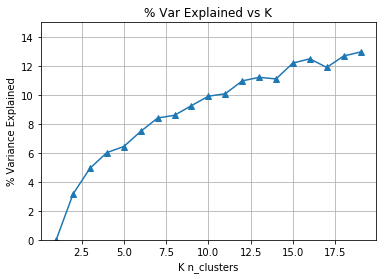

In [71]:
# plot elbow chart

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, '^-')
ax.set_ylim((0,15))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% Var Explained vs K')

The analysis shows that the percent of variance explained steadily creeps up slowly, but there's a 'knee' in the curve at 7 clusters; there's little improvement for each additional cluster added beyond that point.  We'll run the analysis on 7 clusters, though arguments could be made to use a different number.  The low percentage of variance explained by clustering suggests that there's little information gained from K-means for this dataset, but let's look at 7 clusters to see if there's any information to be gleaned.

##K-means with 7 Clusters

In [72]:
pd.set_option('display.max_rows', 10) #sets output to desired length

model_km1 = KMeans(n_clusters=7, init='k-means++', max_iter=100, random_state = 2112) #sets the cluster parameters
print(model_km1)

model_km1.fit(word_count)  
labels = model_km1.labels_

km1_results = pd.DataFrame(data=labels, columns=['Cluster'])

km1_results

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2112, tol=0.0001, verbose=0)


,Cluster
0,6
1,6
2,2
3,6
4,6
...,...
5567,5
5568,6
5569,6
5570,5


Now we have a cluster assignment for each text message in the dataset.  Let's combine this and the original dataset to see if there's any correlation between cluster and spam/ham.

In [73]:
pd.set_option('display.max_rows', 10) #sets output to desired length
cluster_results = spam_data
cluster_results['Cluster'] = km1_results
cluster_results

,Category,Message,Cluster
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",6
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,2
3,ham,U dun say so early hor... U c already then say...,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",6
...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",5
5568,ham,Will ü b going to esplanade fr home?,6
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",6
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,5


The combining was successful, but it's not yet clear how cluster correlates with the texts. First let's see the correlation between cluster and category (ham or spam).

In [74]:
pd.set_option('display.max_rows', 14) #sets output to desired length
cluster_results.groupby(['Category','Cluster']).count()

Message
Category Cluster         
ham      0              1
         1           1014
         2            188
         3            186
         4              1
         5            514
         6           2921
spam     1            138
         2            373
         3              7
         5             48
         6            181

It's hard at first glance to see how this adds information.  Cluster 2 is spam rich (66.5%), but clusters 0 and 4 have only one message each, neither being spam, making them effectively meaningless.  In order to get a sense of what texts are assigned to each cluster, let's look at some examples of each (except for 0 and 4).

In [75]:
pd.set_option('display.max_rows', 20) #sets output to desired length
cluster_results[cluster_results.Cluster==1]

,Category,Message,Cluster
20,ham,Is that seriously how you spell his name?,1
24,ham,Ffffffffff. Alright no way I can meet up with you sooner?,1
28,ham,"I'm back &amp; we're packing the car now, I'll let you know if there's room",1
30,ham,"Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us",1
32,ham,K tell me anything about you.,1
34,spam,Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will no...,1
36,ham,"Oops, I'll let you know when my roommate's done",1
43,ham,WHO ARE YOU SEEING?,1
44,ham,Great! I hope you like your man well endowed. I am &lt;#&gt; inches...,1
46,ham,Didn't you get hep b immunisation in nigeria.,1


Cluster 1 is only 12% spam, and these messages look like normal texts, and the spam example here is using fairly normal English.

In [76]:
cluster_results[cluster_results.Cluster==2]

,Category,Message,Cluster
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,2
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",2
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...,2
8,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 ...,2
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 080...,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",2
12,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LD...",2
19,spam,"England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504...",2
42,spam,07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 0800093...,2
49,ham,U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak sucker. Hospitals are for weak suckers.,2


Cluster 2 is 66.5% spam.  The ham messages seem longer, less well written, or perhaps have a name ('Nigeria' or 'Lowes', to give two examples) that might be more typically associated with spam.

In [77]:
cluster_results[cluster_results.Cluster==3]

,Category,Message,Cluster
13,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,3
27,ham,Did you catch the bus ? Are you frying an egg ? Did you make a tea? Are you eating your mom's left over dinner ? Do you feel my Love ?,3
39,ham,Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or ...,3
41,ham,"Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmmm ... Yummy",3
53,ham,"Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always...",3
127,ham,"Just so that you know,yetunde hasn't sent money yet. I just sent her a text not to bother sending. So its over, you dont have to involve yourself ...",3
155,ham,"You are everywhere dirt, on the floor, the windows, even on my shirt. And sometimes when i open my mouth, you are all that comes flowing out. I dr...",3
158,ham,"Hello, my love. What are you doing? Did you get to that interview today? Are you you happy? Are you being a good boy? Do you think of me?Are you m...",3
161,ham,Keep yourself safe for me because I need you and I miss you already and I envy everyone that see's you in real life,3
192,ham,I'm sorry. I've joined the league of people that dont keep in touch. You mean a great deal to me. You have been a friend at all times even at grea...,3


Cluster 3 is only 3.6% spam.  They look like fairly normal longer texts.

In [78]:
cluster_results[cluster_results.Cluster==5]

,Category,Message,Cluster
15,spam,"XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL",5
18,ham,Fine if thats the way u feel. Thats the way its gota b,5
31,ham,Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't ...,5
33,ham,For fear of fainting with the of all that housework you just did? Quick have a cuppa,5
35,ham,Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am,5
54,spam,SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV,5
68,spam,"Did you hear about the new ""Divorce Barbie""? It comes with all of Ken's stuff!",5
79,ham,Its not the same here. Still looking for a job. How much do Ta's earn there.,5
83,ham,You will be in the place of that man,5
91,ham,Sorry to be a pain. Is it ok if we meet another night? I spent late afternoon in casualty and that means i haven't done any of y stuff42moro and t...,5


Cluster 5 is 8.5% spam.  I don't see any particular correlation here.

In [79]:
cluster_results[cluster_results.Cluster==6]

,Category,Message,Cluster
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",6
1,ham,Ok lar... Joking wif u oni...,6
3,ham,U dun say so early hor... U c already then say...,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",6
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,6
10,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",6
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,6
16,ham,Oh k...i'm watching here:),6
17,ham,Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.,6
21,ham,I‘m going to try for 2 months ha ha only joking,6


Cluster 6 is 5.7% spam.  These look like fairly normal texts.  

In all, the K-means cluster didn't produce clusters that provided much additional insight into the dataset, and it's  not nearly as useful as any of the models, which had far greater predicitive power.  